In [1]:
# Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.__version__

'0.11.1'

In [31]:
!pip3 install seaborn

In [3]:
url = "https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/train_titanic.csv"

In [4]:
titanic_data_set = pd.read_csv(url, error_bad_lines=False)

In [5]:
titanic_data_set.shape

(891, 12)

In [6]:
titanic_data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
woman = titanic_data_set.loc[titanic_data_set["Sex"]=="female"]["Survived"]
woman_rate = sum(woman)/len(woman)
woman_rate

0.7420382165605095

In [9]:
male = titanic_data_set.loc[titanic_data_set["Sex"]=="male"]["Survived"]
male_rate = sum(male)/len(male)
male_rate

0.18890814558058924

In [10]:
titanic_data_set["name_survived"] = titanic_data_set["Survived"].map({0:"Not_Survived", 1:"Survived"})


/home/sjvasconcello/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

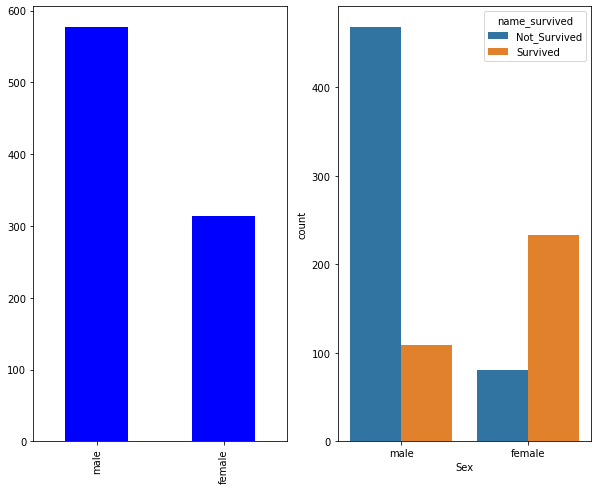

In [11]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
titanic_data_set["Sex"].value_counts().plot.bar(color="blue",ax=ax[0])
sns.countplot("Sex",hue="name_survived", data=titanic_data_set,ax=ax[1])


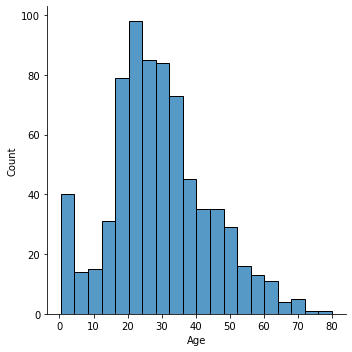

In [12]:
sns.displot(titanic_data_set["Age"].dropna(), kde=False, )

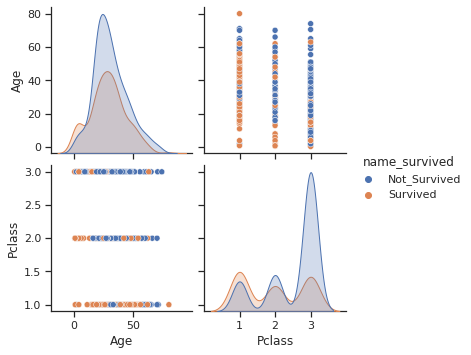

In [16]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(titanic_data_set, vars=["Age", "Pclass"], hue="name_survived")

In [18]:
titanic_data_set.corr(method="pearson")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


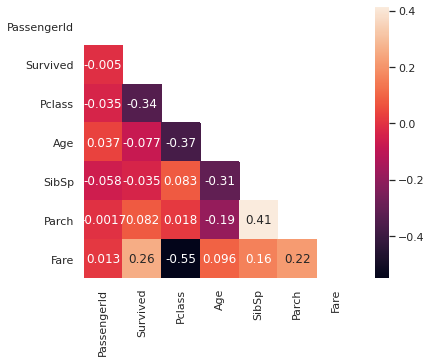

In [20]:
corr_matrix = titanic_data_set.corr(method="pearson")
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_matrix, 
                     mask=mask, 
                     square=True, 
                     annot=True)